In [3]:
"""
Python script to invoke the API's
"""

import requests
import time
import pprint


def do_post_request(json_dict, host_name="http://localhost",
                    port_num="5000", end_point="fetch_data"):
    """
    Function to do the post request
    :param json_dict: API POST Request Contents
    :param host_name: Name of the host
    :param port_num: Port number of the host name
    :param end_point: API to hit
    :return: response status code
    """
    url_ = "{}:{}/{}".format(host_name, port_num, end_point)
    resp = requests.post(url_, json=json_dict)

    return resp.status_code, resp.json()


def do_get_request(host_name="http://localhost", port_num="5000", end_point="fetch_data"):
    """
    Function to do the post request
    :param host_name: Name of the host
    :param port_num: Port number of the host name
    :param end_point: API to hit
    :return: response status code
    """
    url_ = "{}:{}/{}".format(host_name, port_num, end_point)
    resp_get = requests.get(url_)

    return resp_get.status_code, resp_get.json()


In [15]:
# # =======================================  Sample POST Request for fetch data
print(" POST Request for fetch data ")
api_request = {
    "src": "kaggle",
    "data_uri": "rashikrahmanpritom/covid-wwo-pneumonia-chest-xray",
}
status, resp = do_post_request(json_dict=api_request)
if status == 200:
    pprint.pprint(resp)
else:
    print("Fetch data failed")



 POST Request for fetch data 
{'status': True, 'user_msg': 'Data Download Complete'}


In [16]:
sleep_sec = 5
print('Waiting {} secs ...'.format(sleep_sec))
time.sleep(sleep_sec)
# # =====================================  Sample POST Request for model training
print(" POST Request for model training ")
api_request = {
    "model_name": "VGG16",
    "fine_tune_flag": True,
    "fine_tune_lyr": 4
}
status, resp = do_post_request(json_dict=api_request, end_point="model_train")
if status == 200:
    pprint.pprint(resp)
else:
    print("POST Request for model training failed")



Waiting 5 secs ...
 POST Request for model training 
{'user_msg': 'Model training initiated'}


In [ ]:
# sleep_sec = 180
# print('Waiting {} secs ...'.format(sleep_sec))
# time.sleep(sleep_sec)
# # =====================================  Sample GET Request for model training status
# print(" GET Request for model training status ")
# status, resp = do_get_request(end_point="get_train_state")
# if status == 200:
#     pprint.pprint(resp)
# else:
#     print("GET Request for model training status Failed")
#

In [ ]:
# sleep_sec = 5
# print('Waiting {} secs ...'.format(sleep_sec))
# time.sleep(sleep_sec)
# # # =====================================  Sample GET Request for evaluation results
# print(" GET Request for evaluation results ")
# status, resp = do_get_request(end_point="get_evaluation_reports")
# if status == 200:
#     pprint.pprint(resp)
# else:
#     print("GET Request for model evaluation results Failed")
#




In [17]:
sleep_sec = 180
print('Waiting {} secs ...'.format(sleep_sec))
time.sleep(sleep_sec)
# # =======================================  Sample POST Request for prediction results
print(" POST Request for prediction results ")
api_request = {
    "image_uri": "https://www.princeton.edu/sites/default/files/styles/scale_1440/public/images/2020/05/x-ray-image-2b_full.jpg",
    "activation_layer_name": ["block5_conv3"]
}
status, resp = do_post_request(json_dict=api_request, end_point="model_predict")
if status == 200:
    pprint.pprint(resp)
else:
    print("POST Request for prediction failed")


Waiting 180 secs ...
 POST Request for prediction results 
{'predicted_label': 'covid_without_PNEUMONIA',
 'predicted_score': [4.0679699608858755e-09, 1.0]}


In [30]:
import io
import PIL.Image as Image

 GET Activation maps 


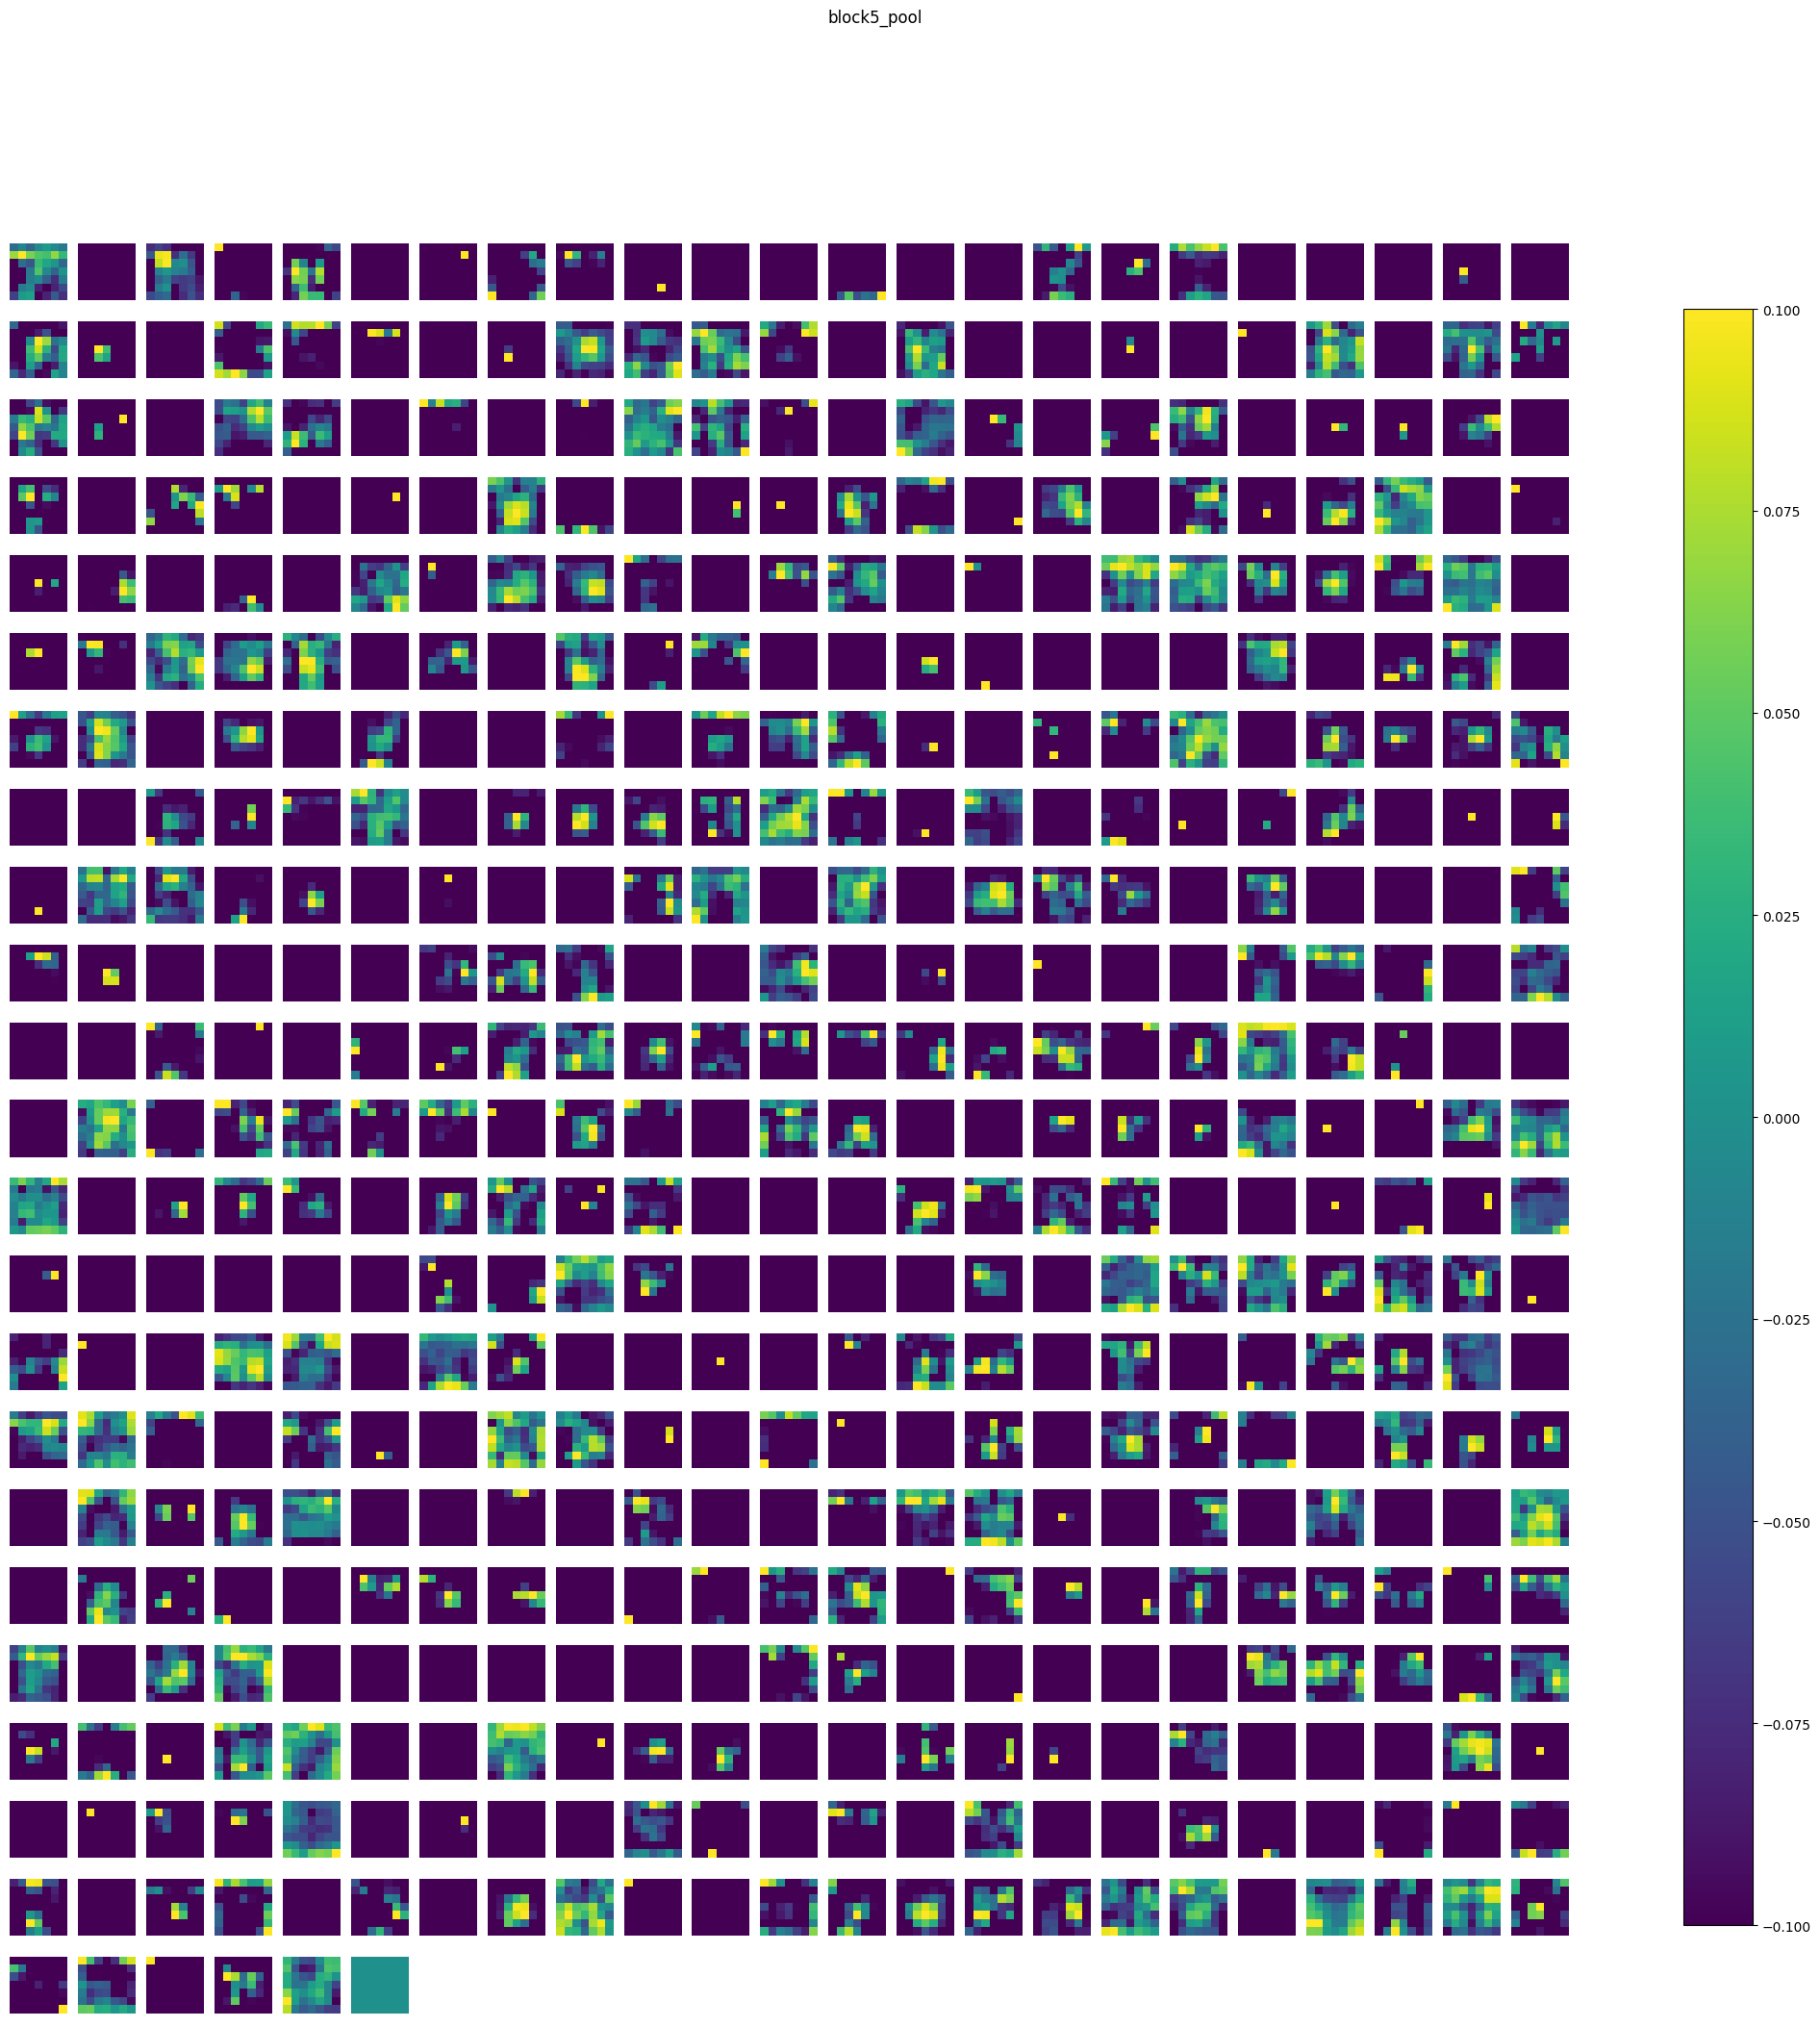

In [44]:
# # # =====================================  Sample GET activation maps
print(" GET Activation maps ")

host_name="http://localhost"
port_num="8000"
end_point="get_activation_maps"
url_ = "{}:{}/{}".format(host_name, port_num, end_point)
resp_get = requests.get(url_)
image = Image.open(io.BytesIO(resp_get.content))
display(image)